# Thermographic analysis


Number of pixels: 320  x  240


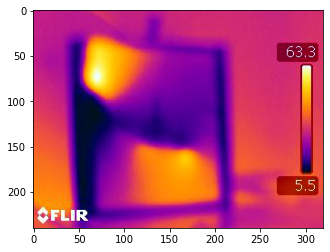

In [37]:
import pylab as plt
import numpy as np

# Load the image
img = plt.imread("IR_8667.jpg")
#Grayscale
gray_raw=np.dot(img, [0.299, 0.587, 0.114])
#Dimensions
width=gray_raw.shape[1]
height=gray_raw.shape[0]
print('Number of pixels:',width, ' x ', height)

plt.imshow(img)


## Grid resolution: <font color='red'>Modify</font> the values "dx" and "dy"

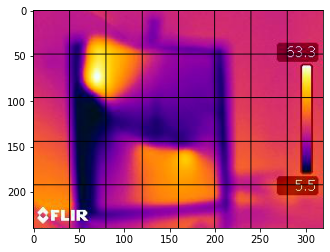

In [38]:
# Grid lines at these intervals (in pixels)
# dx and dy should be submultiples of 320 and 240, respectively
dx, dy = 40,48

# Custom (rgb) grid color
grid_color = [0,0,0]

# Modify the image to include the grid
img[:,::dx,:] = grid_color
img[::dy,:,:] = grid_color

# Show the result
plt.imshow(img)
plt.show()

## Temperature statement:  <font color='red'>Modify</font>  the "Tmax" and "Tmin" values based on color bar numbers

In [39]:
#Set max and min Temperature
Tmin=5.5
Tmax=63.3

#Intensity to Temperature transformation 0-->dark-->cold & 255-->brigth-->hot
def transform(Val_Gray):
    Temperatura=(Val_Gray*(Tmax-Tmin)/255)+Tmin
    return Temperatura

## Asignation of areas

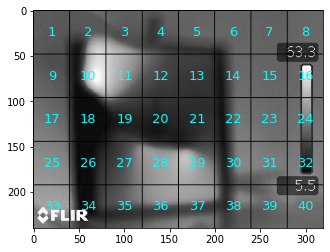

In [40]:
#Image in gray scale with grids
gray_img=np.dot(img, [0.299, 0.587, 0.114])
plt.imshow(gray_img, cmap='gray')
#steps
x_s=int(width/dx)
y_s=int(height/dy)
#Label of areas
for j in range(y_s):
    for i in range(x_s):
        x_pos=int(dx/2)+(dx*i)
        y_pos=int(dy/2)+(dy*j)
        number= str((i+(j*x_s))+1)    
        text_kwargs = dict(ha='center', va='center', fontsize=13, color='cyan')                                                                                                         
        plt.text(x_pos, y_pos, number,**text_kwargs)


## <font color='red'>Modify</font> the area of interest "A" by setting the number

Smallest: 10.821000000000002 Biggest: 134.748


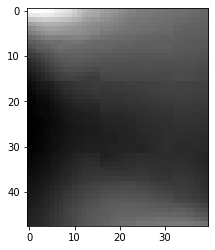

In [41]:
A=19

fila=int((A-1)/x_s)
columna=(A-1)%x_s
subimg=gray_raw[(fila)*dy:(fila+1)*dy,(columna)*dx:(columna+1)*dx]
#Max and Min intensities
smallest = np.amin(subimg)
biggest = np.amax(subimg)
print('Smallest:', smallest, 'Biggest:', biggest)
plt.imshow(subimg, cmap='gray')


The temperature difference is: 28.09012


Text(20.0, 24.0, '36.04°C & 7.95°C')

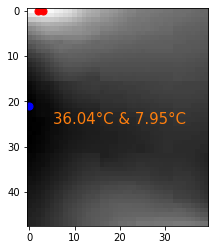

In [42]:
#Show where are placed the hot and cold spots 
plt.imshow(subimg, cmap='gray')
arrays_big=np.where(subimg == biggest)
arrays_small=np.where(subimg==smallest)

sols_big=np.asarray(arrays_big).T.tolist()
sols_small=np.asarray(arrays_small).T.tolist()

for i in range(len(sols_small)):
    temp=sols_small[i]
    plt.scatter(temp[1],temp[0], s=50, c='blue', marker='o')
    
for j in range(len(sols_big)):
    temp1=sols_big[j]
    plt.scatter(temp1[1],temp1[0],s=50,c='red', marker='o')
    
subst=transform(biggest)-transform(smallest)
print('The temperature difference is:', subst)

s=str("%.2f" % transform(biggest))+'°C & '+str("%.2f" % transform(smallest))+'°C'
#s=str(transform(biggest))+'hola'

text_kwargs = dict(ha='center', va='center', fontsize=15, color='C1')                                                    
                                                     
plt.text(dx/2, dy/2, s,**text_kwargs)
                                                     